In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix
from itertools import product

### Load the data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

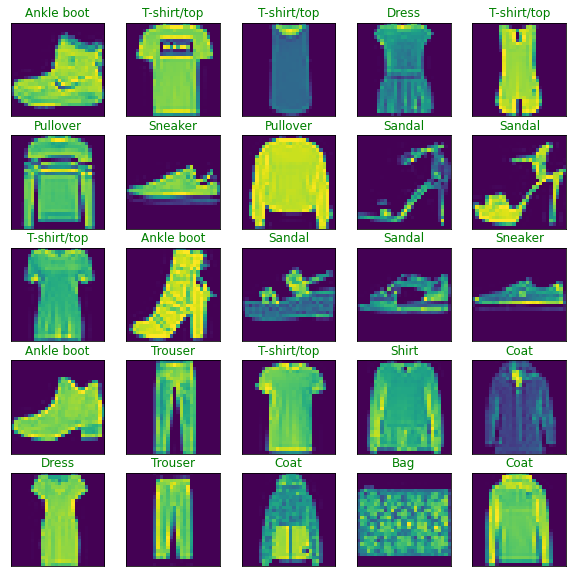

In [ ]:
figure = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_train[i]))
    # Set the title for each image
    ax.set_title(class_names[y_train[i]], color=("green"))

### Data Normalization

In [ ]:
# scale the images into 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
x_valid = x_valid.astype('float32') / 255

In [ ]:
# we want that our images have shape(28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
print('Train images shape: ', x_train.shape)
print(x_train.shape[0], "train images")
print(x_test.shape[0], "test images")

Train images shape:  (55000, 28, 28, 1)
55000 train images
10000 test images
5000 valid images


### Buil the model

In [ ]:
input_shape = (28,28,1)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

### Train the model

In [ ]:
batch_size = 64
epochs = 15

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# fit the data into the model
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.1)

Epoch 1/15
760/760 - 34s - loss: 0.3737 - accuracy: 0.8661 - val_loss: 0.3168 - val_accuracy: 0.8876
Epoch 2/15
760/760 - 34s - loss: 0.3456 - accuracy: 0.8749 - val_loss: 0.2984 - val_accuracy: 0.8900
Epoch 3/15
760/760 - 34s - loss: 0.3274 - accuracy: 0.8810 - val_loss: 0.2918 - val_accuracy: 0.8913
Epoch 4/15
760/760 - 34s - loss: 0.3113 - accuracy: 0.8868 - val_loss: 0.2748 - val_accuracy: 0.9041
Epoch 5/15
760/760 - 39s - loss: 0.3004 - accuracy: 0.8902 - val_loss: 0.2640 - val_accuracy: 0.9039
Epoch 6/15
760/760 - 34s - loss: 0.2916 - accuracy: 0.8948 - val_loss: 0.2620 - val_accuracy: 0.9037
Epoch 7/15
760/760 - 34s - loss: 0.2820 - accuracy: 0.8950 - val_loss: 0.2640 - val_accuracy: 0.9033
Epoch 8/15
760/760 - 34s - loss: 0.2761 - accuracy: 0.8993 - val_loss: 0.2524 - val_accuracy: 0.9083
Epoch 9/15
760/760 - 34s - loss: 0.2720 - accuracy: 0.9012 - val_loss: 0.2510 - val_accuracy: 0.9100
Epoch 10/15
760/760 - 34s - loss: 0.2658 - accuracy: 0.9035 - val_loss: 0.2435 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26493340730667114
Test accuracy: 0.90420001745224


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.26493340730667114, acc: 0.90420001745224



In [ ]:
# save the model 
model.save('second_model.h5')

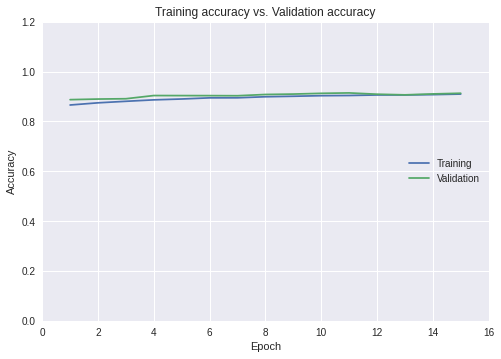

In [ ]:
import matplotlib
matplotlib.style.use('seaborn')
epochs = len(history.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['accuracy'])
plt.plot(x, history.history['val_accuracy'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

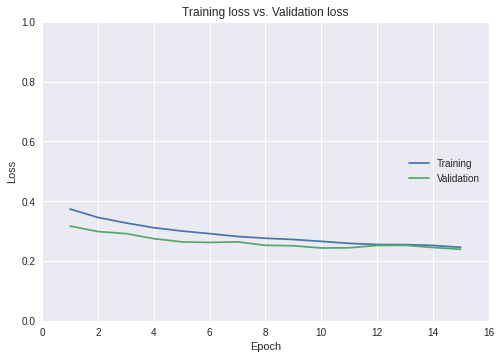

In [ ]:
matplotlib.style.use('seaborn')
epochs = len(history.history['loss'])
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, history.history['loss'])
plt.plot(x, history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

### Confusion Matrix

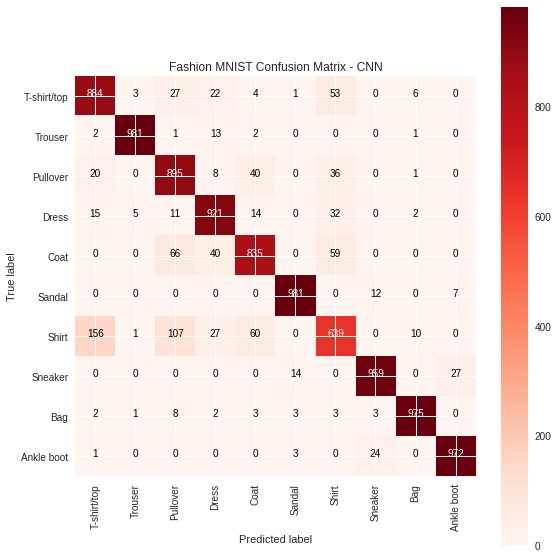

In [ ]:
#Create Multiclass Confusion Matrix

preds = model.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=90)
plt.yticks(np.arange(10), class_names)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

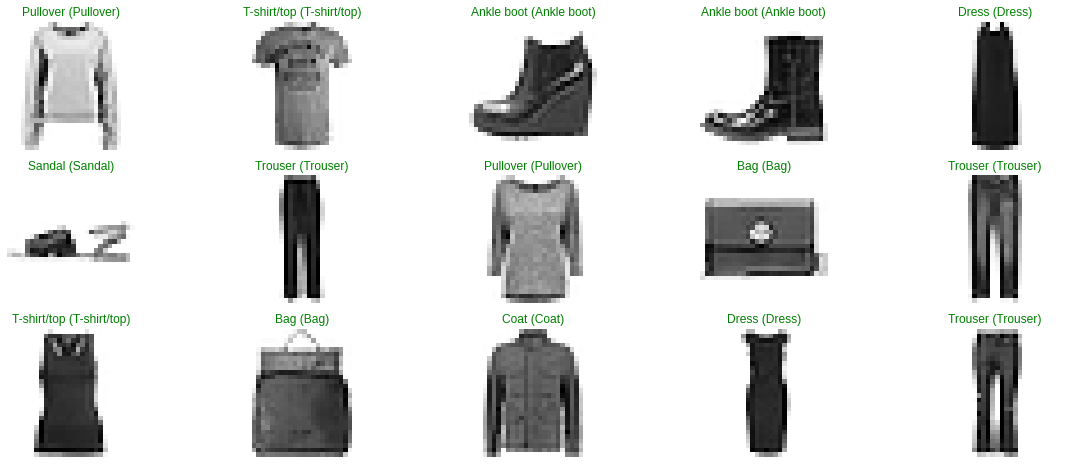

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))